In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import csv


observations_data = pd.read_csv("gene_expression.csv", header=None, on_bad_lines='warn', delimiter=';') 
observations_data = observations_data.apply(lambda x: x.str.replace(',', '.').astype(float) if x.dtype == 'object' else x)
print(observations_data.iloc[:, 0])
classes_data = pd.read_csv("label.csv", header=None, dtype="string")
print(classes_data)
features_names = pd.read_csv("geneNames.txt", header=None).values.flatten()  



0    -72.889853
1    -30.348187
2     64.596258
3     10.499035
4    -88.139853
        ...    
67   -86.542631
68   -17.778742
69    33.874035
70    17.235147
71   -43.292631
Name: 0, Length: 72, dtype: float64
    0
0   1
1   1
2   1
3   1
4   1
.. ..
67  1
68  1
69  1
70  1
71  1

[72 rows x 1 columns]


In [44]:
print(len(observations_data))
print(len(classes_data))
assert len(observations_data) == len(classes_data), "Number of observations and classes do not match"
X = observations_data 
y = classes_data.iloc[:, 0]  

72
72


In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [54]:
clf = DecisionTreeClassifier(random_state=42, criterion="entropy")
clf.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', random_state=42)

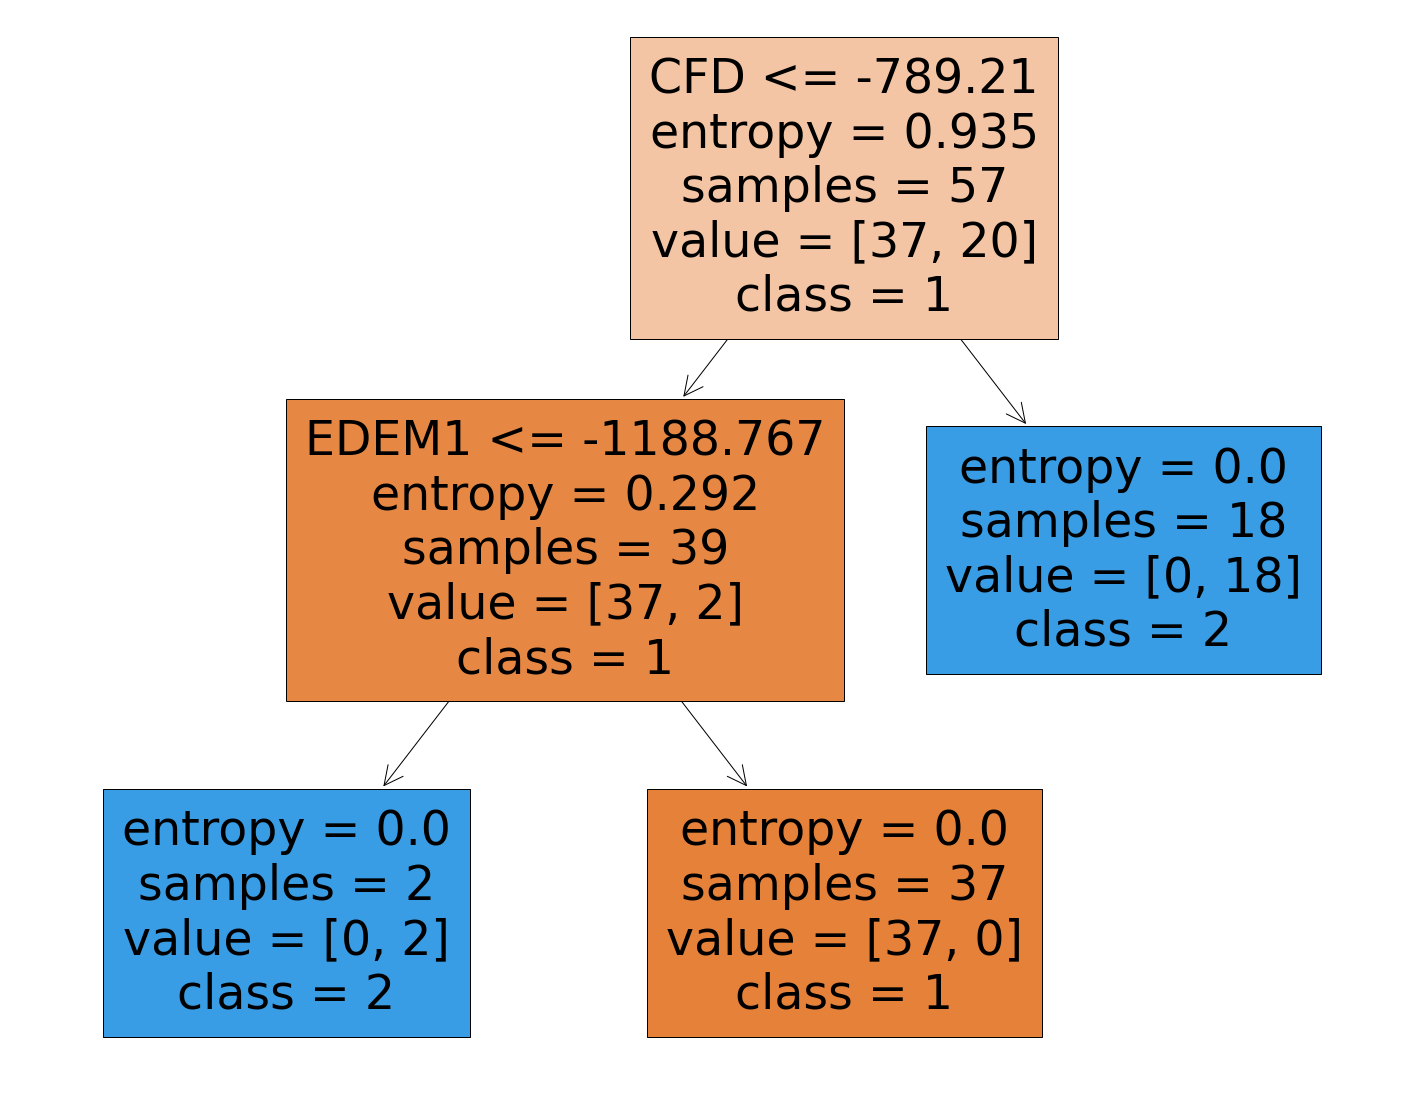

In [55]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=features_names,  
                   class_names=clf.classes_,
                   filled=True)

In [52]:
training_accuracy = clf.score(X_train, y_train)
print("Training Accuracy:", training_accuracy)

Training Accuracy: 1.0


In [53]:
cv_accuracy = cross_val_score(clf, X, y, cv=5)
print("Cross-validation Accuracy:", cv_accuracy.mean())

Cross-validation Accuracy: 0.7638095238095238


In [ ]:
### GENE CFD AND GENE EDEM1 ARE MOST IMPORTANT IN MY DATASET. IN THE STUDY FORM 1999 THERE IS 0 INFOMATION ABOUT THESE GENES 

In [85]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


pca = PCA()
V_train = pca.fit_transform(X_train_scaled)


In [86]:
K_range = range(1, min(X_train.shape[0], X_train.shape[1]))  
best_tree = 0
best_accuracy = 0
iteration = 0
for K in K_range:
    Z = V_train[:, :K]

    tree = DecisionTreeClassifier(criterion="entropy")
    tree.fit(Z, y_train)

    cv_accuracy = cross_val_score(tree, Z, y_train, cv=5).mean()

    if cv_accuracy > best_accuracy or (cv_accuracy == best_accuracy and tree.tree_.node_count < best_tree.tree_.node_count):
        best_accuracy = cv_accuracy
        best_tree = tree
        iteration = K

    print(f"Cross-validation Accuracy (K={K}): {cv_accuracy}")

Z_test = pca.transform(X_test_scaled)[:, :best_tree.n_features_]
test_accuracy = best_tree.score(Z_test, y_test)

print("Best Chosen Tree was in iteration:")
print(iteration)
print("Testing Accuracy of the Best Chosen Tree:", test_accuracy)

Cross-validation Accuracy (K=1): 0.6439393939393939
Cross-validation Accuracy (K=2): 0.7893939393939394
Cross-validation Accuracy (K=3): 0.7742424242424242
Cross-validation Accuracy (K=4): 0.840909090909091
Cross-validation Accuracy (K=5): 0.7893939393939394
Cross-validation Accuracy (K=6): 0.7893939393939394
Cross-validation Accuracy (K=7): 0.7893939393939394
Cross-validation Accuracy (K=8): 0.7893939393939394
Cross-validation Accuracy (K=9): 0.7363636363636363
Cross-validation Accuracy (K=10): 0.7545454545454546
Cross-validation Accuracy (K=11): 0.790909090909091
Cross-validation Accuracy (K=12): 0.790909090909091
Cross-validation Accuracy (K=13): 0.8075757575757576
Cross-validation Accuracy (K=14): 0.7378787878787879
Cross-validation Accuracy (K=15): 0.7575757575757576
Cross-validation Accuracy (K=16): 0.7530303030303032
Cross-validation Accuracy (K=17): 0.7727272727272728
Cross-validation Accuracy (K=18): 0.7727272727272728
Cross-validation Accuracy (K=19): 0.790909090909091
Cross-

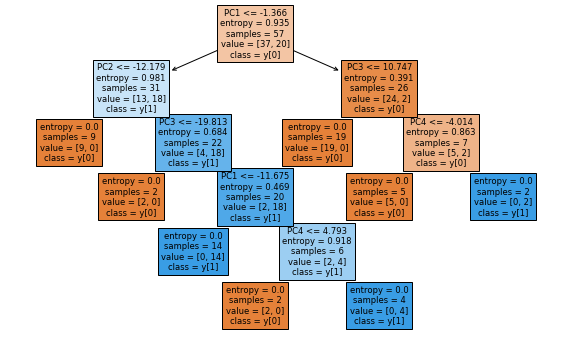

In [87]:
plt.figure(figsize=(10, 6))
plot_tree(best_tree, filled=True, feature_names=[f"PC{i}" for i in range(1, best_tree.n_features_ + 1)], class_names=True)
plt.show()

In [89]:
cv_accuracy = cross_val_score(best_tree, Z, y_train, cv=5)
print("Cross-validation Accuracy:", cv_accuracy.mean())

Cross-validation Accuracy: 0.7242424242424242


In [90]:
from sklearn.cluster import KMeans
import numpy as np

used_features_indices = best_tree.tree_.feature[best_tree.tree_.feature >= 0]

# Get the corresponding genes (features)
used_genes = X.columns[used_features_indices]
print(used_genes)


Int64Index([0, 1, 2, 0, 3, 2, 3], dtype='int64')


In [92]:
# Extract the active genes using K-means clustering
n_clusters = len(used_genes)  # Number of clusters
n_clusters = len(used_genes)  # Number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X[used_genes])
active_genes_indices = np.argsort(kmeans.cluster_centers_.sum(axis=1))
print(active_genes_indices)

[5 0 3 2 4 6 1]


In [ ]:
for active_genes_indices 
active_genes = features_names[active_genes_indices]
active_genes = [str(gene) for gene in active_genes]
gene_list = "\n".join(active_genes)
print(gene_list)